In [2]:
from main import df_encoded
!pip install pandas
!pip install xgboost
!pip install numpy
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
df['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [5]:
df['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [6]:
df['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [7]:
df['ExerciseAngina'].unique()

array(['N', 'Y'], dtype=object)

In [8]:
df['Sex'].unique()

array(['M', 'F'], dtype=object)

In [9]:
ChestPainType = {
    'ATA': 0,
    'NAP': 1,
    'ASY': 2,
    'TA' : 3
}
RestingECG = {
    'Normal': 0,
    'ST'    : 1,
    'LVH'   : 2
 }
ST_Slope = {
    'Up'  : 0,
    'Flat': 1,
    'Down': 2
}
ExerciseAngina = {
    'N' : 0,
    'Y' : 1
}
Sex = {
    'M' : 0,
    'F' : 1
}

In [10]:
df_encoded = df.copy()

df_encoded['ChestPainType'] = df_encoded['ChestPainType'].map(ChestPainType)
df_encoded['RestingECG'] = df_encoded['RestingECG'].map(RestingECG)
df_encoded['ST_Slope'] = df_encoded['ST_Slope'].map(ST_Slope)
df_encoded['ExerciseAngina'] = df_encoded['ExerciseAngina'].map(ExerciseAngina)
df_encoded['Sex'] = df_encoded['Sex'].map(Sex)

In [11]:
df_encoded.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,0,140,289,0,0,172,0,0.0,0,0
1,49,1,1,160,180,0,0,156,0,1.0,1,1
2,37,0,0,130,283,0,1,98,0,0.0,0,0
3,48,1,2,138,214,0,0,108,1,1.5,1,1
4,54,0,1,150,195,0,0,122,0,0.0,0,0


<Axes: >

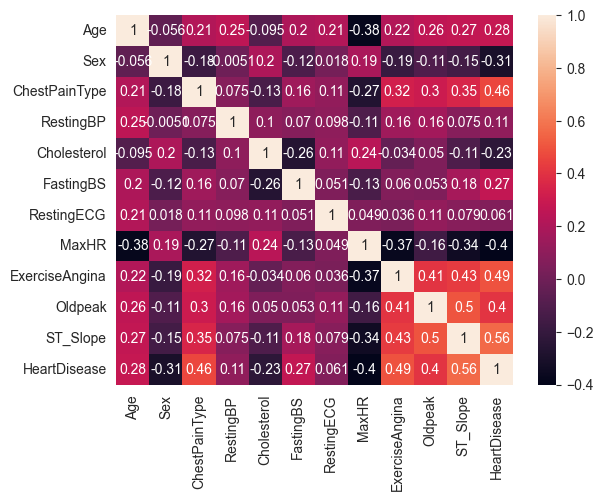

In [12]:
corr = df_encoded.corr()
sns.heatmap(corr, annot=True)

In [13]:
X = df_encoded.drop('HeartDisease', axis=1).copy()
y = df_encoded['HeartDisease']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
np.random.seed(42)

# Updated GPU version for XGBoost ≥ 2.0
xgb_model = XGBClassifier(
    tree_method='hist',          # hist + device='cuda' for GPU
    device='cuda',               # use your RTX 4060
    objective='binary:logistic', # or 'multi:softprob'
    eval_metric='logloss'
)

param_grid = {
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.03, 0.05],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.7, 0.9],
    'n_estimators': [300, 500]
}

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=5,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

random_search.fit(X_train, y_train)

print("\nBest Accuracy:", random_search.best_score_)
print("Best Parameters:", random_search.best_params_)

y_pred = random_search.best_estimator_.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Fitting 3 folds for each of 5 candidates, totalling 15 fits

Best Accuracy: 0.8759897401583584
Best Parameters: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 4, 'learning_rate': 0.01, 'colsample_bytree': 0.7}

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.84      0.86        77
           1       0.89      0.91      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



D:\Projects\Heartician-MyWAY\.venv\Lib\site-packages\xgboost\core.py:729: UserWarning: [19:07:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])